# Introduction to PyTorch

## 1. Tensors

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors are also optimized for automatic differentiation.

In [1]:
import torch
import numpy as np

### 1.1 Initializing a tensor

From data

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

From numpy array

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

From another tensor. The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7946, 0.7040],
        [0.5456, 0.2042]]) 



With random or constant values:

In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2751, 0.8794, 0.0411],
        [0.2489, 0.1883, 0.5194]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 1.2. Attributes of a Tensor

In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


The shape works as expected

In [7]:
a, b = tensor.shape

print(a, b, tensor.shape[1])

3 4 4


### 1.3. Tensor Operations

They are [described here](https://pytorch.org/docs/stable/torch.html). Each of these operations can be run on the GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using `.to` method.

In [8]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

Slicing just as NumPy

In [9]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Joining tensors You can use `torch.cat` to concatenate a sequence of tensors along a given dimension. See also `torch.stack`, another tensor joining op that is subtly different from `torch.cat`.

In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

t2 = torch.cat([tensor, tensor], dim=0)
print(t2)

t3 = torch.stack([tensor, tensor], dim=0)
print(t3.shape)
print(t3)

t4 = torch.stack([tensor, tensor], dim=1)
print(t4.shape)
print(t4)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
torch.Size([2, 4, 4])
tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])
torch.Size([4, 2, 4])
tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


Arithmetic

In [11]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

Single-element tensors If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using `item()`:

In [12]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In-place operations Operations that store the result into the operand are called in-place. They are denoted by a `_` suffix. For example: `x.copy_(y)`, `x.t_()`, will change `x`.

In [13]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


Be careful using this, since the previous tensor is lost and may produce problems with derivatives.

### 1.4. Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

In [14]:
t = torch.ones(5)
print(f't: {t}')
n = t.numpy()
print(f'n: {n}')

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [15]:
n[3] = n[3] + 2
print(f't: {t}')
print(f'n: {n}')

t[:3] += 2
print(f't: {t}')
print(f'n: {n}')

t: tensor([1., 1., 1., 3., 1.])
n: [1. 1. 1. 3. 1.]
t: tensor([3., 3., 3., 3., 1.])
n: [3. 3. 3. 3. 1.]


## 2. Datasets & Dataloaders

PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

### 2.1. Loading Datasets

Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.


We load the FashionMNIST Dataset with the following parameters:

- `root` is the path where the train/test data is stored,
- `train` specifies training or test dataset,
- `download=True` downloads the data from the internet if it’s not available at root.
- `transform` and target_transform specify the feature and label transformations

In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### 2.2. Iterating and Visualizing the Dataset

We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.

torch.Size([1, 28, 28])
9 , label = Ankle Boot


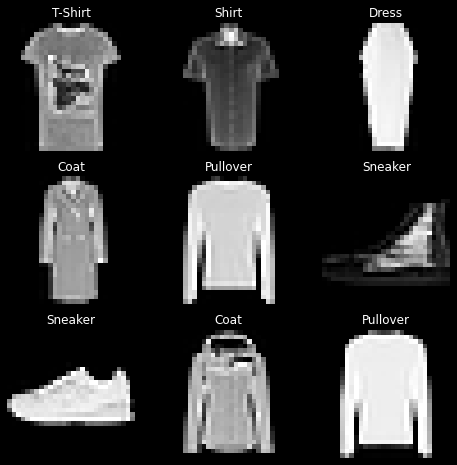

In [17]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

print(training_data[0][0].shape) # data
print(training_data[0][1], f', label = {labels_map[training_data[0][1]]}')       # label

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 2.3. Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`. Take a look at this implementation; the FashionMNIST images are stored in a directory `img_dir`, and their labels are stored separately in a CSV file `annotations_file`.

In [18]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#### `__init__`

The `__init__` function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms.

The `labels.csv` file looks like:

```csv
    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9

```

#### `__len__`

The `__len__` function returns the number of samples in our dataset.

#### `__getitem__`

The `__getitem__` function loads and returns a sample from the dataset at the given index `idx`. Based on the index, it identifies the image’s location on disk, converts that to a tensor using `read_image`, retrieves the corresponding label from the csv data in `self.img_labels`, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

### 2.4. Preparing your data for training with DataLoaders

The `Dataset` retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s `multiprocessing` to speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy API.

In [19]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### 2.5. Ierate through the DataLoader

We have loaded that dataset into the `DataLoader` and can iterate through the dataset as needed. Each iteration below returns a batch of `train_features` and `train_labels` (containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at `Samplers`).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


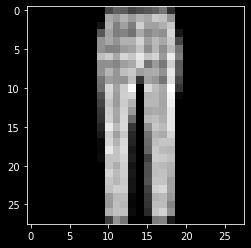

Label: Trouser


In [20]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))  # It iterates through BATCHES
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()  # Squeeze removes the axis with dimension 1
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

In [21]:
i = 0
for feat_batch, lab_batch in train_dataloader: # iterate for two batches
    print(feat_batch.shape, lab_batch.shape)
    i += 1
    for feat_item, lab_item in zip(feat_batch, lab_batch):  # get first item of batch
        print(feat_item.shape, labels_map[lab_item.item()])
        break
    
    if i == 2:
        break

torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([1, 28, 28]) Dress
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([1, 28, 28]) Ankle Boot


## 3. Transforms

Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -`transform` to modify the features and `target_transform` to modify the labels - that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use `ToTensor` and `Lambda`.

In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)


#### `ToTensor()`

`ToTensor` converts a PIL image or NumPy `ndarray` into a `FloatTensor`. and scales the image’s pixel intensity values in the range [0., 1.]

#### Lambda Transforms

Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls `scatter_` which assigns a `value=1` on the index as given by the label `y`.

## 4. Build the Neural Network

Neural networks comprise of layers/modules that perform operations on data. The `torch.nn` namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the `nn.Module`. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

In the following sections, we’ll build a neural network to classify images in the FashionMNIST dataset.

In [3]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} device')

Using cpu device


### 4.1. Define the class

We define our neural network by subclassing `nn.Module`, and initialize the neural network layers in `__init__`. Every `nn.Module` subclass implements the operations on input data in the `forward` method.

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of `NeuralNetwork`, and move it to the `device`, and print its structure.

In [5]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model’s `forward`, along with some background operations. Do not call `model.forward()` directly!

Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class. We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.

In [18]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
print(f'Predicted probabilities for each class {pred_probab}.')
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")

Predicted probabilities for each class tensor([[0.0858, 0.1005, 0.1041, 0.1032, 0.0952, 0.0965, 0.1006, 0.1007, 0.1042,
         0.1093]], grad_fn=<SoftmaxBackward0>).
Predicted class: 9


### 4.2. Model Layers

Let’s break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network.

In [19]:
input_image = torch.rand(3, 28, 28)
print('Three input images of 28x28')
print(input_image.shape)

Three input images of 28x28
torch.Size([3, 28, 28])


#### 4.2.1. `nn.Flatten`

We initialize the nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [22]:
flatten = nn.Flatten()  # Create the layer
flat_image = flatten(input_image)  # Pass the images through layer
print(flat_image.size())

torch.Size([3, 784])


#### 4.2.2. nn.Linear

The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

In [23]:
layer1 = nn.Linear(in_features=28*28, out_features=20)  # Create the Layer
hidden1 = layer1(flat_image) # Obtain the first hidden output of the three images
print(hidden1.size())

torch.Size([3, 20])


#### 4.2.3. nn.ReLU

Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce *nonlinearity*, helping neural networks learn a wide variety of phenomena.

In this model, we use nn.ReLU between our linear layers, but there’s other activations to introduce non-linearity in your model.

In [24]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-9.4240e-02,  5.1463e-02,  5.0354e-02,  2.7259e-01,  3.2598e-01,
          6.8374e-02,  7.5923e-01,  4.7330e-04, -2.9564e-01,  5.5409e-02,
          3.5623e-01,  3.1890e-01,  5.5373e-01,  9.4661e-02,  7.2195e-01,
          1.0861e-01, -1.4716e-01, -3.1627e-01,  1.8346e-01,  1.6117e-01],
        [ 1.6277e-01,  3.4847e-01,  2.0175e-01,  4.9210e-01,  8.6517e-02,
          1.6812e-01,  3.7413e-01, -9.0439e-02, -2.3585e-01, -3.9899e-01,
         -6.1144e-02,  1.6925e-01,  8.4230e-02,  1.6613e-01,  9.8452e-01,
          2.2362e-01,  1.5563e-01, -2.3646e-01,  2.4665e-02, -1.2428e-01],
        [ 4.3781e-01,  3.9357e-01,  2.0275e-01, -2.1749e-01,  2.5564e-01,
         -1.3497e-01,  5.7849e-01, -3.9111e-01, -2.9685e-01, -1.7863e-01,
         -5.1345e-02,  3.1433e-01,  6.3836e-01,  1.8454e-01,  7.3199e-01,
          1.6519e-01, -7.5848e-02,  4.0777e-02,  2.7829e-01, -2.3863e-01]],
       grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000e+00, 5.1463e-02, 5.0354e-02, 2.7

#### 4.2.4. nn.Sequential

`nn.Sequential` is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like `seq_modules`.

In [25]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

#### 4.2.5. nn.Softmax

The last linear layer of the neural network returns *logits* - raw values in [-infty, infty] - which are passed to the `nn.Softmax` module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. `dim` parameter indicates the dimension along which the values must sum to 1.

In [26]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### 4.3. Model Parameters

Many layers inside a neural network are *parameterized*, i.e. have associated weights and biases that are optimized during training. Subclassing `nn.Module` automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.

In [27]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0290, -0.0082, -0.0292,  ...,  0.0090,  0.0014, -0.0216],
        [-0.0123, -0.0327, -0.0094,  ..., -0.0289,  0.0207, -0.0011]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0069, -0.0196], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0274, -0.0121, -0.0115,  ..., -0.0387, -0.0074, -0.0238],
        [-0.0427,  0.0210, -0.0212,  ..., -0.0084,  0.0130,  0.0255]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

## 5. Automatic Differentiation with `torch.autograd`

When training neural networks, the most frequently used algorithm is **back propagation**. In this algorithm, parameters (model weights) are adjusted according to the **gradient** of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called `torch.autograd`. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input `x`, parameters `w` and `b`, and some loss function. It can be defined in PyTorch in the following manner:

In [28]:
import torch

x = torch.rand(5)   # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)


### 5.1. Tensors, Functions and Computational graph

This code defines the following computational graph:

[See image](https://pytorch.org/tutorials/_images/comp-graph.png)

In this network, `w` and `b` are parameters, which we need to optimize. Thus, we need to be able to compute the gradients of loss function with respect to those variables. In order to do that, we set the `requires_grad` property of those tensors.

A function that we apply to tensors to construct computational graph is in fact an object of class `Function`. This object knows how to compute the function in the *forward* direction, and also how to compute its derivative during the *backward propagation* step. A reference to the backward propagation function is stored in `grad_fn` property of a tensor.

In [31]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7f646c970f70>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f646c54d880>


### 5.2. Computing Gradients

To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, namely, we need $\frac{\partial loss}{\partial w}$​ and $\frac{\partial loss}{\partial b}$​ under some fixed values of `x` and `y`. To compute those derivatives, we call `loss.backward()`, and then retrieve the values from `w.grad` and `b.grad`:

In [32]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0244, 0.2068, 0.0692],
        [0.0300, 0.2537, 0.0848],
        [0.0066, 0.0561, 0.0188],
        [0.0268, 0.2265, 0.0758],
        [0.0008, 0.0066, 0.0022]])
tensor([0.0371, 0.3135, 0.1049])


### 5.3. Disabling Gradient Tracking

By default, all tensors with `requires_grad=True` are tracking their computational history and support gradient computation. However, there are some cases when we do not need to do that, for example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do *forward* computations through the network. We can stop tracking computations by surrounding our computation code with `torch.no_grad()` block:

In [33]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Another way to achieve the same result is to use the `detach()` method on the tensor:

In [34]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False



There are reasons you might want to disable gradient tracking:

- To mark some parameters in your neural network as **frozen parameters**. This is a very common scenario for finetuning a pretrained network
- To **speed up computations** when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

[Continue discussion regarding gradients and DAGs](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html#more-on-computational-graphs)


## 6. Optimizing Model Parameters

Now that we have a model and data it’s time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration (called an *epoch*) the model makes a guess about the output, calculates the error in its guess (*loss*), collects the derivatives of the error with respect to its parameters (as we saw in the previous section), and **optimizes** these parameters using gradient descent. For a more detailed walkthrough of this process, check out this video on [backpropagation from 3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).

Load previous code

In [35]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

### 6.1. Hyperparameters

Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates ([read more](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html) about hyperparameter tuning).


We define the following hyperparameters for training:

- **Number of Epochs** - the number times to iterate over the dataset
- **Batch Size** - the number of data samples propagated through the network before the parameters are updated
- **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.



In [36]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### 6.2. Optimization Loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an **epoch**.


Each epoch consists of two main parts:

- The Train Loop - iterate over the training dataset and try to converge to optimal parameters.
- The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.


#### 6.2.1. Loss Function

When presented with some training data, our untrained network is likely not to give the correct answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include `nn.MSELoss` (Mean Square Error) for regression tasks, and `nn.NLLLoss` (Negative Log Likelihood) for classification. `nn.CrossEntropyLoss` combines `nn.LogSoftmax` and `nn.NLLLoss`.

We pass our model’s output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.

In [37]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

#### 6.2.2. Optimizer

Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the `optimizer` object. Here, we use the SGD optimizer; additionally, there are many different optimizers available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

In [38]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


Inside the training loop, optimization happens in three steps:

- Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
- Backpropagate the prediction loss with a call to `loss.backward()`. PyTorch deposits the gradients of the loss w.r.t. each parameter.
- Once we have our gradients, we call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.



### 6.3. Full Implementation

We define `train_loop` that loops over our optimization code, and `test_loop` that evaluates the model’s performance against our test data.

In [39]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            # The argmax function transforms the vector of logits to a one-hot
            # vector. The obtained vector represents the result of the classification
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to `train_loop` and `test_loop`. Feel free to increase the number of epochs to track the model’s improving performance.

In [41]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.042761  [    0/60000]
loss: 2.029376  [ 6400/60000]
loss: 1.945887  [12800/60000]
loss: 1.966671  [19200/60000]
loss: 1.885189  [25600/60000]
loss: 1.828348  [32000/60000]
loss: 1.842516  [38400/60000]
loss: 1.753070  [44800/60000]
loss: 1.745278  [51200/60000]
loss: 1.659016  [57600/60000]
Test Error: 
 Accuracy: 57.9%, Avg loss: 1.672259 

Epoch 2
-------------------------------
loss: 1.722829  [    0/60000]
loss: 1.690643  [ 6400/60000]
loss: 1.556292  [12800/60000]
loss: 1.605237  [19200/60000]
loss: 1.491591  [25600/60000]
loss: 1.474116  [32000/60000]
loss: 1.479817  [38400/60000]
loss: 1.404337  [44800/60000]
loss: 1.421417  [51200/60000]
loss: 1.324916  [57600/60000]
Test Error: 
 Accuracy: 62.0%, Avg loss: 1.353596 

Epoch 3
-------------------------------
loss: 1.428190  [    0/60000]
loss: 1.403801  [ 6400/60000]
loss: 1.250589  [12800/60000]
loss: 1.336461  [19200/60000]
loss: 1.221049  [25600/60000]
loss: 1.234519  [32000/600

## 7. Save and Load the Model

In this section we will look at how to persist model state with saving, loading and running model predictions.

In [42]:
import torch
import torchvision.models as models

### 7.1. Saving and Loading Model Weights

PyTorch models store the learned parameters in an internal state dictionary, called `state_dict`. These can be persisted via the `torch.save` method:

In [47]:
torch.save(model.state_dict(), 'Intro_to_PyTorch_Model_weights.pth')

To load model weights, you need to create an instance of the same model first, and then load the parameters using `load_state_dict()` method.

In [48]:
model = 1 # To make sure I see that it is overwritten

model = NeuralNetwork()  # New instance with untrained weights
model.load_state_dict(torch.load('Intro_to_PyTorch_Model_weights.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

### 7.2. Saving and Loading MOdels with Shapes

When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass `model` (and not `model.state_dict()`) to the saving function:

In [49]:
torch.save(model, 'Intro_to_PyTorch_Model_full.pth')

Then we can load the model like this:

In [51]:
model = 1  # Ensure overwritting

model = torch.load('Intro_to_PyTorch_Model_full.pth')
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

This approach uses Python **pickle** module when serializing the model, thus it relies on the actual class definition to be available when loading the model.